In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

/
Mounted at /content/drive


In [ ]:
%cd content

/content


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
%cd content
!unzip "/content/drive/MyDrive/Videira_Dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Videira_Dataset/labels/train/rgb_1706.txt  
  inflating: Videira_Dataset/labels/train/rgb_7993.txt  
  inflating: Videira_Dataset/labels/train/rgb_1116.txt  
  inflating: Videira_Dataset/labels/train/rgb_2939.txt  
  inflating: Videira_Dataset/labels/train/rgb_0344.txt  
  inflating: Videira_Dataset/labels/train/rgb_8548.txt  
  inflating: Videira_Dataset/labels/train/rgb_5684.txt  
  inflating: Videira_Dataset/labels/train/rgb_2812.txt  
  inflating: Videira_Dataset/labels/train/rgb_3567.txt  
  inflating: Videira_Dataset/labels/train/rgb_2856.txt  
  inflating: Videira_Dataset/labels/train/rgb_1450.txt  
  inflating: Videira_Dataset/labels/train/rgb_1372.txt  
  inflating: Videira_Dataset/labels/train/rgb_4693.txt  
  inflating: Videira_Dataset/labels/train/rgb_2843.txt  
  inflating: Videira_Dataset/labels/train/rgb_7681.txt  
  inflating: Videira_Dataset/labels/train/rgb_3355.txt  
  inflating: Videira_Dataset/labels/t

##Test Yolov11 Instance Segmentation

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
#model = YOLO("path/to/best.pt")  # load a custom model

# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg", save=True)  # predict on an image

# Access the results
for result in results:
    xy = result.masks.xy  # mask in polygon format
    xyn = result.masks.xyn  # normalized
    masks = result.masks.data  # mask in matrix format (num_objects x H x W)

100%|██████████| 5.90M/5.90M [00:00<00:00, 67.2MB/s]


100%|██████████| 134k/134k [00:00<00:00, 5.44MB/s]

image 1/1 /bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 102.6ms
Speed: 3.2ms preprocess, 102.6ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict4


##Validate labels

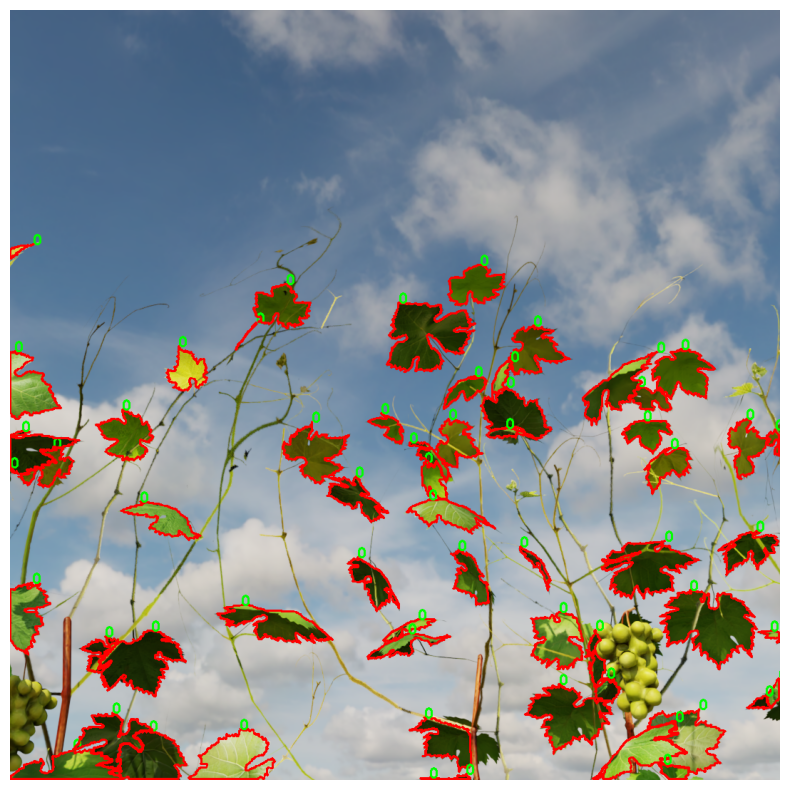

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Paths
image_path = '/content/Videira_Dataset/images/val/rgb_0385.png'
label_path = '/content/Videira_Dataset/labels/val/rgb_0385.txt'

# Load image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

# Load annotation
with open(label_path, 'r') as f:
    lines = f.readlines()

# Draw annotations
for line in lines:
    parts = list(map(float, line.strip().split()))
    class_id = int(parts[0])
    points = np.array(parts[1:], dtype=np.float32).reshape(-1, 2)
    points *= [w, h]
    points = points.astype(np.int32)

    cv2.polylines(image, [points], isClosed=True, color=(255, 0, 0), thickness=2)
    cv2.putText(image, str(class_id), tuple(points[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Show the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

#Train Yolov11 from custom dataset

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLO11 segment model
model = YOLO("yolo11m-seg.pt")

# Train the model
results = model.train(data="/content/drive/MyDrive/yolov11/leaf.yaml", epochs=100, imgsz=640)

100%|██████████| 43.3M/43.3M [00:00<00:00, 99.1MB/s]


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/yolov11/leaf.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

100%|██████████| 755k/755k [00:00<00:00, 23.7MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024, 256, 1, True]          
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 20                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 189.1±26.9 MB/s, size: 2202.9 KB)


train: Scanning /content/Videira_Dataset/labels/train... 8692 images, 691 backgrounds, 0 corrupt: 100%|██████████| 9383/9383 [01:17<00:00, 120.47it/s]


train: New cache created: /content/Videira_Dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1491.0±1670.9 MB/s, size: 1623.9 KB)


val: Scanning /content/Videira_Dataset/labels/val... 2174 images, 157 backgrounds, 0 corrupt: 100%|██████████| 2331/2331 [00:30<00:00, 76.34it/s]


val: New cache created: /content/Videira_Dataset/labels/val.cache
Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      15.3G      1.048      1.789     0.7998     0.9997        811        640: 100%|██████████| 587/587 [11:13<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:02<00:00,  1.17it/s]


                   all       2331     200595      0.899      0.761      0.855      0.646      0.892      0.746      0.838      0.549

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      15.7G     0.9555      1.406     0.5488     0.9283        534        640: 100%|██████████| 587/587 [11:06<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:04<00:00,  1.13it/s]


                   all       2331     200595      0.901      0.774      0.863      0.633      0.894      0.761       0.85      0.556

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      16.7G     0.9728      1.365     0.5575     0.9316        754        640: 100%|██████████| 587/587 [11:09<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:04<00:00,  1.13it/s]


                   all       2331     200595      0.904      0.785      0.867      0.647      0.903      0.779      0.863      0.589

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      16.4G     0.9564      1.333     0.5462     0.9284        989        640: 100%|██████████| 587/587 [11:08<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:11<00:00,  1.01it/s]


                   all       2331     200595      0.909      0.798       0.88      0.674      0.902      0.781      0.864      0.576

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      17.5G     0.9147      1.283     0.5162     0.9174        932        640: 100%|██████████| 587/587 [11:15<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:05<00:00,  1.11it/s]


                   all       2331     200595      0.921      0.805      0.887      0.689      0.914      0.791      0.875       0.59

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      15.5G     0.8823      1.252        0.5     0.9102        878        640: 100%|██████████| 587/587 [11:08<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:10<00:00,  1.04it/s]


                   all       2331     200595      0.922      0.813      0.892      0.693      0.914        0.8      0.879      0.597

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      17.1G     0.8549      1.203     0.4834     0.9027        524        640: 100%|██████████| 587/587 [11:09<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:08<00:00,  1.06it/s]


                   all       2331     200595      0.921      0.814      0.895      0.699      0.912      0.799      0.881      0.603

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      16.4G     0.8264      1.148     0.4671     0.8949        935        640: 100%|██████████| 587/587 [11:13<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:08<00:00,  1.07it/s]


                   all       2331     200595      0.927      0.822      0.898      0.711      0.918      0.811      0.888      0.614

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      16.1G     0.8125      1.136      0.458      0.892        886        640: 100%|██████████| 587/587 [11:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:07<00:00,  1.08it/s]


                   all       2331     200595      0.931      0.824      0.902      0.718      0.921      0.809      0.888      0.616

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      16.6G     0.7944      1.106     0.4483     0.8877       1203        640: 100%|██████████| 587/587 [11:13<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:10<00:00,  1.04it/s]


                   all       2331     200595      0.927      0.827      0.903       0.72      0.918      0.812       0.89      0.618

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.8G      0.781      1.079     0.4404     0.8836       1314        640: 100%|██████████| 587/587 [11:18<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:08<00:00,  1.07it/s]


                   all       2331     200595      0.934      0.829      0.906      0.727      0.928      0.819      0.898      0.638

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      16.2G     0.7766      1.085     0.4376     0.8832        570        640: 100%|██████████| 587/587 [11:14<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:08<00:00,  1.07it/s]


                   all       2331     200595      0.931      0.834      0.908      0.728      0.922      0.822      0.898      0.635

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.7G     0.7641      1.059     0.4299       0.88        547        640: 100%|██████████| 587/587 [11:23<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:05<00:00,  1.12it/s]


                   all       2331     200595      0.932      0.838       0.91      0.731      0.925      0.824        0.9      0.632

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      16.6G     0.7552      1.045      0.424     0.8766        860        640: 100%|██████████| 587/587 [11:20<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:10<00:00,  1.03it/s]


                   all       2331     200595      0.935      0.839      0.912      0.738      0.926      0.825      0.901      0.637

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      15.2G      0.748      1.034     0.4196     0.8752        878        640: 100%|██████████| 587/587 [11:09<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:06<00:00,  1.10it/s]


                   all       2331     200595      0.936      0.842      0.913      0.739      0.927      0.829      0.903      0.642

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      15.7G     0.7417      1.024      0.415     0.8724        438        640: 100%|██████████| 587/587 [11:16<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:04<00:00,  1.13it/s]


                   all       2331     200595       0.94      0.842      0.914      0.744      0.931      0.827      0.903      0.639

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      18.4G      0.732      1.008     0.4101     0.8695        655        640: 100%|██████████| 587/587 [11:12<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:05<00:00,  1.11it/s]


                   all       2331     200595      0.939      0.844      0.916      0.745      0.931      0.832      0.907      0.647

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      16.8G     0.7277      1.007     0.4066     0.8683        944        640: 100%|██████████| 587/587 [11:05<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:04<00:00,  1.14it/s]


                   all       2331     200595       0.94      0.844      0.915      0.747      0.931      0.832      0.906      0.647

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      14.9G     0.7212     0.9939     0.4027     0.8677        820        640: 100%|██████████| 587/587 [11:04<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:04<00:00,  1.14it/s]


                   all       2331     200595      0.941      0.847      0.918      0.751      0.932      0.832      0.906      0.645

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100        16G     0.7178     0.9951     0.4015     0.8671        422        640: 100%|██████████| 587/587 [11:06<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:02<00:00,  1.17it/s]


                   all       2331     200595      0.939      0.847      0.918      0.749       0.93      0.835      0.908      0.648

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      18.8G     0.7126     0.9829     0.3969     0.8645        563        640: 100%|██████████| 587/587 [11:03<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:04<00:00,  1.13it/s]


                   all       2331     200595       0.94       0.85      0.919      0.753      0.932      0.835      0.908      0.649

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      17.6G     0.7097       0.98     0.3949     0.8641        810        640: 100%|██████████| 587/587 [11:03<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:06<00:00,  1.09it/s]


                   all       2331     200595      0.941      0.853      0.921      0.754      0.932      0.838      0.909      0.649

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      19.1G     0.7016     0.9655     0.3912     0.8621        629        640: 100%|██████████| 587/587 [11:01<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.14it/s]


                   all       2331     200595      0.942      0.853      0.922      0.758      0.932       0.84      0.911      0.653

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      16.2G      0.698     0.9595     0.3881     0.8615        690        640: 100%|██████████| 587/587 [11:03<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:02<00:00,  1.17it/s]


                   all       2331     200595      0.943      0.854      0.923      0.759      0.933      0.839      0.911      0.653

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      15.4G     0.6912     0.9485     0.3852     0.8594       1414        640: 100%|██████████| 587/587 [11:09<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:04<00:00,  1.13it/s]


                   all       2331     200595      0.943      0.855      0.923      0.763      0.934       0.84      0.912      0.656

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      18.1G     0.6897      0.952     0.3827     0.8593        656        640: 100%|██████████| 587/587 [11:06<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.16it/s]


                   all       2331     200595      0.942      0.856      0.923      0.761      0.934      0.842      0.913      0.656

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      15.3G     0.6918     0.9568     0.3835     0.8588        627        640: 100%|██████████| 587/587 [11:11<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:04<00:00,  1.13it/s]


                   all       2331     200595      0.944      0.858      0.924      0.763      0.935      0.844      0.914      0.657

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      16.8G     0.6841     0.9418     0.3797     0.8575        666        640: 100%|██████████| 587/587 [11:09<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:02<00:00,  1.17it/s]


                   all       2331     200595      0.944      0.858      0.925      0.765      0.936      0.843      0.914       0.66

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100        15G     0.6799     0.9386     0.3769     0.8559        655        640: 100%|██████████| 587/587 [11:06<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:05<00:00,  1.12it/s]


                   all       2331     200595      0.946      0.859      0.926      0.767      0.938      0.846      0.916      0.664

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      16.8G     0.6775     0.9344     0.3754     0.8553        616        640: 100%|██████████| 587/587 [11:05<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.15it/s]


                   all       2331     200595      0.944      0.862      0.926      0.767      0.936      0.848      0.917      0.664

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.1G     0.6719     0.9227     0.3721     0.8536        741        640: 100%|██████████| 587/587 [11:08<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:02<00:00,  1.17it/s]


                   all       2331     200595      0.947       0.86      0.926      0.768      0.937      0.847      0.917      0.665

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      19.5G     0.6724     0.9291     0.3728     0.8541        597        640: 100%|██████████| 587/587 [11:13<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.15it/s]


                   all       2331     200595      0.946      0.862      0.927      0.771      0.937      0.847      0.917      0.663

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      16.3G     0.6707     0.9248     0.3707     0.8525        547        640: 100%|██████████| 587/587 [11:07<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.14it/s]


                   all       2331     200595      0.947      0.862      0.928      0.773      0.936      0.849      0.917      0.663

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      17.6G      0.665     0.9167     0.3688     0.8521        719        640: 100%|██████████| 587/587 [11:06<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.15it/s]


                   all       2331     200595      0.945      0.863      0.928      0.775      0.936      0.848      0.917      0.663

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      15.5G      0.662      0.911     0.3671     0.8506        790        640: 100%|██████████| 587/587 [11:04<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:04<00:00,  1.14it/s]


                   all       2331     200595      0.946      0.864      0.929      0.775      0.937      0.849      0.918      0.666

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      15.7G     0.6583     0.9095     0.3644     0.8504        477        640: 100%|██████████| 587/587 [11:07<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:02<00:00,  1.17it/s]


                   all       2331     200595      0.946      0.866      0.929      0.774      0.937      0.851      0.918      0.665

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      15.6G     0.6569     0.9021     0.3632     0.8485        938        640: 100%|██████████| 587/587 [11:06<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.14it/s]


                   all       2331     200595      0.948      0.865       0.93      0.776      0.939      0.852      0.921       0.67

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      13.5G     0.6529     0.8975     0.3609     0.8488        775        640: 100%|██████████| 587/587 [11:04<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.15it/s]


                   all       2331     200595      0.947      0.866      0.929      0.778      0.937      0.853       0.92      0.668

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100        15G     0.6501     0.8937     0.3597     0.8488        936        640: 100%|██████████| 587/587 [11:03<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:01<00:00,  1.18it/s]


                   all       2331     200595      0.947      0.867       0.93      0.779      0.937      0.852       0.92      0.667

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      18.9G     0.6441      0.881     0.3561     0.8466        755        640: 100%|██████████| 587/587 [11:07<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.15it/s]


                   all       2331     200595      0.948      0.867      0.931      0.779      0.939      0.852      0.919      0.669

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      15.5G     0.6462     0.8945     0.3571      0.847        962        640: 100%|██████████| 587/587 [11:08<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.15it/s]


                   all       2331     200595      0.949      0.867      0.931       0.78      0.939      0.852      0.921       0.67

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      15.7G     0.6435      0.887      0.355     0.8459        586        640: 100%|██████████| 587/587 [11:09<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:02<00:00,  1.18it/s]


                   all       2331     200595      0.948      0.868      0.931      0.781      0.938      0.853       0.92      0.669

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      15.6G     0.6427     0.8843     0.3551     0.8459        323        640: 100%|██████████| 587/587 [11:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:01<00:00,  1.18it/s]


                   all       2331     200595      0.948      0.869      0.932      0.782      0.939      0.854      0.922      0.672

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      15.2G      0.639     0.8816     0.3525     0.8452        365        640: 100%|██████████| 587/587 [11:07<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.15it/s]


                   all       2331     200595      0.948       0.87      0.933      0.784      0.938      0.853      0.921       0.67

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      15.3G     0.6383     0.8808      0.352     0.8448        892        640: 100%|██████████| 587/587 [11:07<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.14it/s]


                   all       2331     200595      0.947       0.87      0.933      0.784      0.939      0.854      0.922      0.673

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      14.3G     0.6352     0.8759     0.3498     0.8438        338        640: 100%|██████████| 587/587 [11:05<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:02<00:00,  1.17it/s]


                   all       2331     200595      0.949      0.871      0.933      0.784       0.94      0.854      0.922      0.673

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      17.5G     0.6345     0.8752     0.3498     0.8431        817        640: 100%|██████████| 587/587 [11:07<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.14it/s]


                   all       2331     200595      0.949      0.871      0.934      0.786       0.94      0.856      0.923      0.674

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      16.1G     0.6297     0.8681     0.3483     0.8431        629        640: 100%|██████████| 587/587 [11:08<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:04<00:00,  1.13it/s]


                   all       2331     200595      0.949      0.872      0.934      0.786      0.938      0.856      0.922      0.673

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      16.2G     0.6321     0.8737     0.3468     0.8427       1244        640: 100%|██████████| 587/587 [11:10<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:02<00:00,  1.17it/s]


                   all       2331     200595       0.95      0.872      0.934      0.787       0.94      0.856      0.923      0.675

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      16.9G     0.6307     0.8748     0.3473     0.8427       1017        640: 100%|██████████| 587/587 [11:16<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:01<00:00,  1.19it/s]


                   all       2331     200595      0.949      0.874      0.934      0.787      0.939      0.858      0.923      0.675

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      17.6G     0.6241     0.8572     0.3434     0.8413        593        640: 100%|██████████| 587/587 [11:05<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:02<00:00,  1.17it/s]


                   all       2331     200595       0.95      0.873      0.935      0.789       0.94      0.858      0.924      0.676

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      19.8G     0.6221     0.8599     0.3427      0.841        507        640: 100%|██████████| 587/587 [11:10<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:01<00:00,  1.19it/s]


                   all       2331     200595      0.951      0.873      0.935      0.788      0.941      0.858      0.924      0.677

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      15.7G     0.6231     0.8644     0.3429     0.8415        627        640: 100%|██████████| 587/587 [11:05<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:03<00:00,  1.16it/s]


                   all       2331     200595      0.951      0.874      0.935      0.789       0.94      0.857      0.923      0.675

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      14.6G     0.6175     0.8509       0.34     0.8387        955        640: 100%|██████████| 587/587 [11:13<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [01:01<00:00,  1.18it/s]


                   all       2331     200595      0.951      0.873      0.936       0.79      0.941      0.858      0.925      0.677

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.5G     0.5979     0.8162     0.3377     0.8406       1347        640:   2%|▏         | 12/587 [00:11<09:21,  1.02it/s]


KeyboardInterrupt: 

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/yolov11/best_leaf.pt")
results = model("/content/t.jpg", save=True, conf=0.5)  # predict on an image

# Access the results
for result in results:
    xy = result.masks.xy  # mask in polygon format
    xyn = result.masks.xyn  # normalized
    masks = result.masks.data  # mask in matrix format (num_objects x H x W)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/t.jpg: 640x640 18 leafs, 757.3ms
Speed: 5.7ms preprocess, 757.3ms inference, 58.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


In [ ]:
import os
import cv2
from ultralytics import YOLO

# Load model
model = YOLO("/content/drive/MyDrive/yolov11/best_leaf.pt")

# Image path
image_path = "/content/IMG_7936.jpeg"

# Output folder
output_folder = "/content/detections"
os.makedirs(output_folder, exist_ok=True)

# Run inference
results = model(image_path, save=False, conf=0.5)

# Load original image
original_img = cv2.imread(image_path)
if original_img is None:
    raise ValueError("Image not loaded properly. Check the path.")

original_height, original_width = original_img.shape[:2]

# Process each result
for result_idx, result in enumerate(results):
    boxes = result.boxes.xyxy.cpu().numpy()  # [N, 4]

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box.astype(int)
        x1, y1 = max(x1, 0), max(y1, 0)
        x2, y2 = min(x2, original_width), min(y2, original_height)

        cropped = original_img[y1:y2, x1:x2]

        # Save cropped image
        save_path = os.path.join(output_folder, f"detection_{result_idx}_{i}.png")
        cv2.imwrite(save_path, cropped)

print(f"Saved {len(boxes)} detections to: {output_folder}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/IMG_7936.jpeg: 480x640 44 leafs, 805.4ms
Speed: 16.1ms preprocess, 805.4ms inference, 128.1ms postprocess per image at shape (1, 3, 480, 640)
Saved 44 detections to: /content/detections


In [ ]:
import os
import cv2
import torch
from ultralytics import YOLO
import numpy as np

# Load model
model = YOLO("/content/drive/MyDrive/yolov11/best_leaf.pt")

# Image path
image_path = "/content/IMG_7936.jpeg"

# Output folder
output_folder = "/content/detections"
os.makedirs(output_folder, exist_ok=True)

# Run inference
results = model(image_path, save=False, conf=0.5)

# Load original image using cv2
original_img = cv2.imread(image_path)

# Ensure image is in the right shape (H, W, 3)
if original_img is None:
    raise ValueError("Image not loaded properly. Check the path.")

original_height, original_width = original_img.shape[:2]

# Process each result
for result_idx, result in enumerate(results):
    masks = result.masks.data  # tensor: [N, H, W]
    boxes = result.boxes.xyxy.cpu().numpy()  # [N, 4]

    for i, mask in enumerate(masks):
        # Convert mask tensor to binary uint8 mask (0 or 255)
        mask_np = mask.cpu().numpy()
        mask_np = (mask_np * 255).astype(np.uint8)  # [H, W]

        # Resize mask to match image size if needed (paranoia check)
        if mask_np.shape != original_img.shape[:2]:
            mask_np = cv2.resize(mask_np, (original_width, original_height), interpolation=cv2.INTER_NEAREST)

        # Apply mask to image
        masked_img = cv2.bitwise_and(original_img, original_img, mask=mask_np)

        # Crop the masked image using bounding box
        x1, y1, x2, y2 = boxes[i].astype(int)
        x1, y1 = max(x1, 0), max(y1, 0)
        x2, y2 = min(x2, original_width), min(y2, original_height)

        cropped = masked_img[y1:y2, x1:x2]

        # Save cropped detection
        save_path = os.path.join(output_folder, f"detection_{result_idx}_{i}.png")
        cv2.imwrite(save_path, cropped)

print(f"Saved {len(masks)} detections to: {output_folder}")


##Validate Model

In [ ]:
metrics = model.val()
print("Mean Average Precision for boxes:", metrics.box.map)
print("Mean Average Precision for masks:", metrics.seg.map)

##Export model

In [ ]:
model.export(format="onnx")

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (43.1 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.53', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.53...
ONNX: export success ✅ 8.3s, saved as 'runs/segment/train/weights/best.onnx' (85.5 MB)

Export complete (9.3s)
Results saved to /content/runs/segment/train/weights
Predict:         yolo predict task=segment model=runs/segment/train/weights/best.onnx imgsz=640 

'runs/segment/train/weights/best.onnx'

##XAI

In [ ]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 158 (delta 33), reused 21 (delta 11), pack-reused 99 (from 2)
Receiving objects: 100% (158/158), 52.67 MiB | 38.01 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
%cd YOLO-V8-CAM

/content/YOLO-V8-CAM


In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io
!pip install ttach


In [ ]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image


In [ ]:
img = cv2.imread('/content/IMG_7946.jpeg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [ ]:
import ultralytics
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/yolov11/best_leaf.pt')
model.cpu()

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, tra

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=6a95fefd89757ad3fcd7246251ca734454fa1b18bdc79e9e08829fc2d576b6c0
  Stored in directory: /root/.cache/pip/wheels/bc/52/78/893c3b94279ef238f43a9e89608af648de401b96415bebbd1f
Successfully built grad-cam


In [ ]:
!pip install --upgrade grad-cam

In [ ]:
from pytorch_grad_cam.utils.model_targets import YoloBoxScoreTarget

targets = [YoloBoxScoreTarget(category=class_idx, box=bbox)]
cam = EigenCAM(model, target_layers, targets=targets, task='od')

ImportError: cannot import name 'YoloBoxScoreTarget' from 'pytorch_grad_cam.utils.model_targets' (/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/utils/model_targets.py)


0: 640x640 10 leafs, 610.4ms
Speed: 2.1ms preprocess, 610.4ms inference, 10.8ms postprocess per image at shape (1, 3, 640, 640)


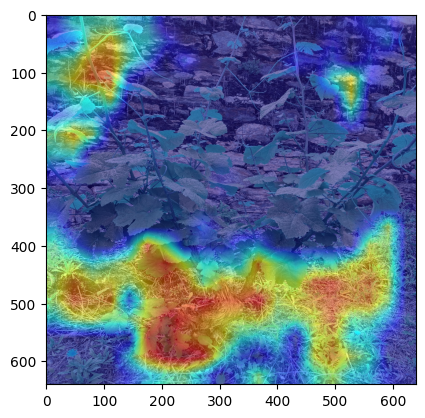

In [ ]:
target_layers =[model.model.model[-2]]
cam = EigenCAM(model, target_layers,task='od')

grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 10 leafs, 627.6ms
Speed: 5.1ms preprocess, 627.6ms inference, 12.1ms postprocess per image at shape (1, 3, 640, 640)


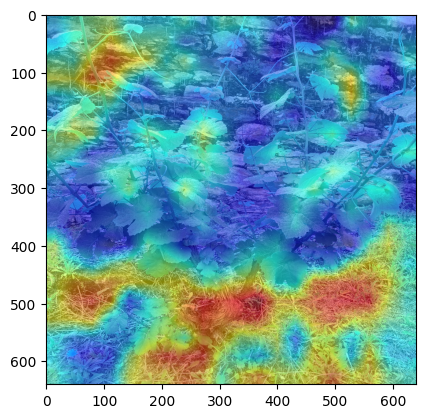

In [ ]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 10 leafs, 643.5ms
Speed: 6.7ms preprocess, 643.5ms inference, 10.8ms postprocess per image at shape (1, 3, 640, 640)


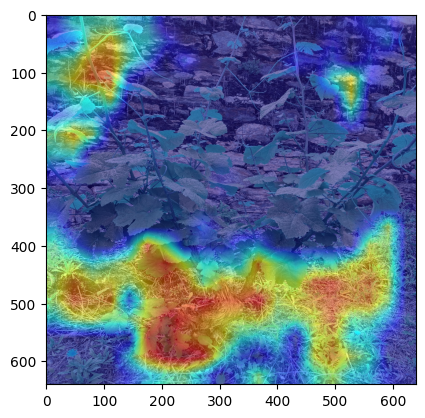

In [ ]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [ ]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 640x640 10 leafs, 566.1ms
Speed: 2.6ms preprocess, 566.1ms inference, 11.8ms postprocess per image at shape (1, 3, 640, 640)


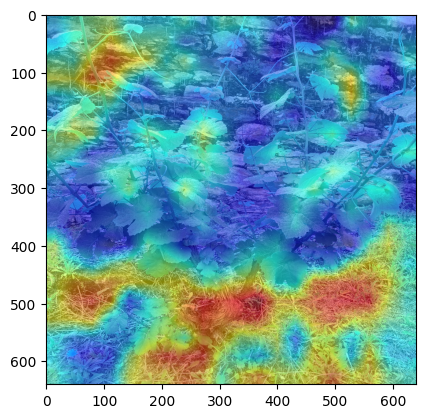

In [ ]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

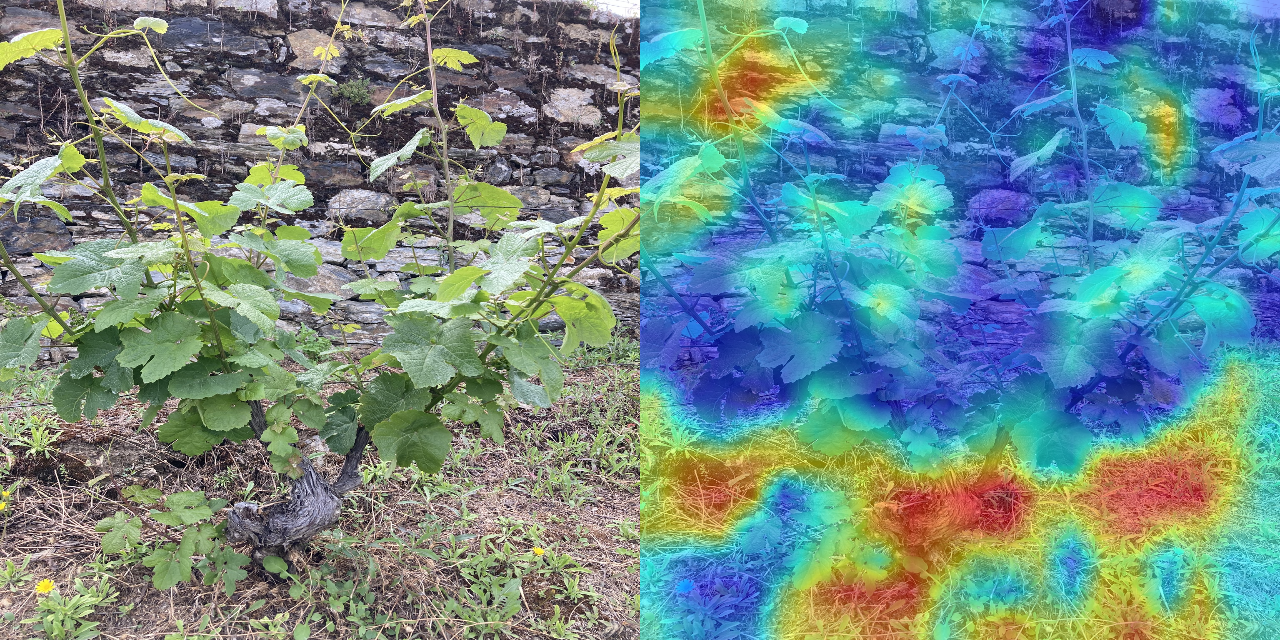

In [ ]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))